<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [3]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [6]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

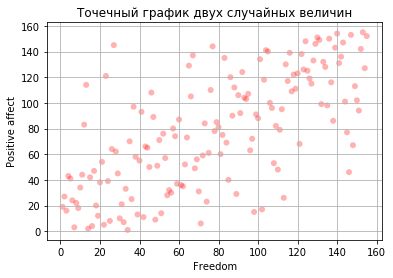

In [8]:
freedom = df['Freedom']
positive = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom , positive, c='red', alpha=0.3, edgecolors='none')
# ax.scatter(positive, c='green', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график двух случайных величин')
plt.show()

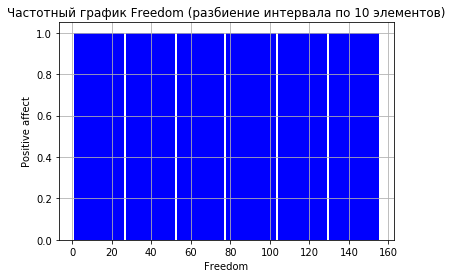

In [22]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 160, facecolor='b')

plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

In [ ]:
# Распределение равномерное

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [51]:
freedom_new = freedom.dropna()

print('Медиана: ', statistics.median(freedom_new))

# print('Значение моды: ', statistics.mode(freedom_new))
# Моду нельзя посчитать, так как все значения разные

print('Математическое ожидание: ',statistics.mean(freedom_new))
print('Стандартное отклонение: ',statistics.pstdev(freedom_new))
print('Дисперсия: ',statistics.pvariance(freedom_new))
print('Минимум: ',min(freedom_new))
print('Максимум: ',max(freedom_new))
print('Размах ',max(freedom_new)-min(freedom_new))
# Выбросы
sum(freedom.isnull())
df[df['Freedom'].isnull()]

Медиана:  78.0
Математическое ожидание:  78.0
Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0
Минимум:  1.0
Максимум:  155.0
Размах  154.0


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


Почему нельзя найти моду?

In [0]:
# Моду нельзя посчитать, так как все значения разные

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6965670458090686


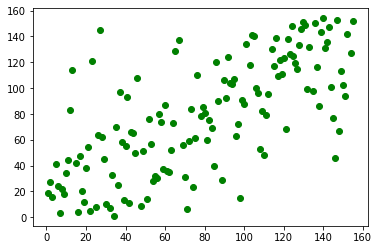

In [65]:
from scipy.stats import pearsonr

df_new = df.dropna()
x = df_new['Freedom']
y = df_new['Positive affect']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y,c = "g", marker='o')
print('Коэффициент корреляции Пирсона:', corr)

In [ ]:
# -1 (минус один) означает полную (функциональную) линейную обратную взаимосвязь.
# 1 (один) – полную (функциональную) линейную положительную взаимосвязь. 
# 0 – отсутствие линейной корреляции (но не обязательно взаимосвязи).

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [76]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm.head())

freedom_2 = min_max_scaler.fit_transform(np.array(freedom).reshape(-1, 1))

print(min(freedom_2))
print(max(freedom_2))

          0
0  0.025974
1  0.032468
2  0.012987
3  0.038961
4  0.116883
[0.]
[1.]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


Построить матрицу корреляций для всех колонок таблицы

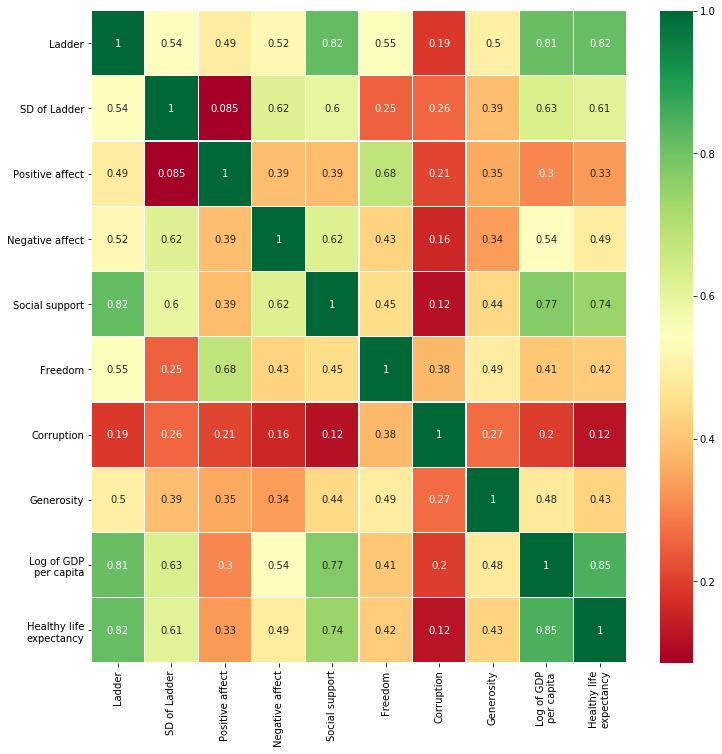

In [77]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [80]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

In [101]:

df['count_price'] = df.groupby('AveragePrice')['AveragePrice'].count()
print(x)


AveragePrice
0.44    1
0.46    1
0.48    1
0.49    2
0.51    5
       ..
3.04    1
3.05    1
3.12    1
3.17    1
3.25    1
Name: AveragePrice, Length: 259, dtype: int64


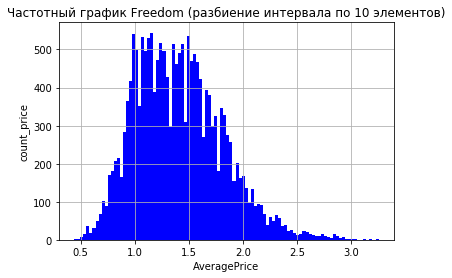

In [102]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 100, facecolor='b')

plt.xlabel('AveragePrice')
plt.ylabel('count_price')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

In [ ]:
# Это нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [107]:
x = df['4046']
y = df['4225']

corr, p_value = pearsonr(x, y)
print(corr)

0.9261099558992298


In [ ]:
# Между колонками сильно выражена прямая зависимость

In [109]:
x = df['4770']
y = df['AveragePrice']

corr, p_value = pearsonr(x, y)
print(corr)

-0.17944598397975614


In [ ]:
# Между колонками очень слабо выраженная обратная зависимость